## 자동차 등록 대수 현황에 따른 예측

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('jeju_car_sign.csv', encoding='cp949')
dataset.head()

,시점,승용(서귀포),승용(제주),승합(서귀포),승합(제주),총계(서귀포),총계(제주)
0,2014.06,47231,172785,3791,10510,74905,223978
1,2014.07,47506,175424,3794,10537,75274,226867
2,2014.08,47730,176824,3791,10523,75562,228372
3,2014.09,47964,178019,3786,10527,75829,229691
4,2014.10,48233,179463,3782,10492,76187,231234


In [2]:
dataset['총계(제주도)'] = dataset['총계(서귀포)'] + dataset['총계(제주)']

Text(0, 0.5, 'car')

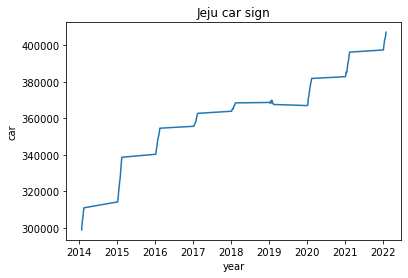

In [3]:
import matplotlib.pyplot as plt

X = dataset['시점']
y = dataset['총계(제주도)']

plt.plot(X,y)
plt.title('Jeju car sign')
plt.xlabel('year')
plt.ylabel('car')

## 제주도 인구비율 증감 그래프

In [4]:
dataset_1 = pd.read_csv('jeju_population.csv', encoding='cp949')
dataset_1.head()

,시점,전국,제주특별자치도
0,2000,47732558,542368
1,2001,48021543,546889
2,2002,48229948,550831
3,2003,48386823,552297
4,2004,48583805,555362


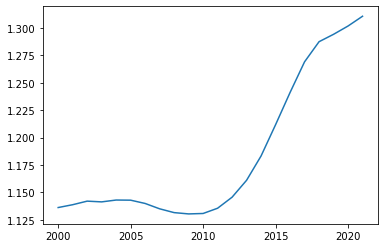

In [5]:
dataset_1['제주도인구비율'] = (dataset_1['제주특별자치도'] / dataset_1['전국'])*100

X1 = dataset_1['시점']
y1 = dataset_1['제주도인구비율']

plt.plot(X1,y1)

## 제주도 대중교통이용목적현황

In [6]:
dataset2 = pd.read_csv('Jeju_transportation_purpose.csv', encoding='cp949')
dataset2

,항목,2014,2015,2016,2017,2018,2019,2020,2021
0,출퇴근,24.2,22.2,16.0,13.4,15.1,15.5,20.2,18.1
1,등하교,39.5,32.8,20.0,25.8,29.3,14.5,12.3,17.5
2,업무,12.8,11.0,7.0,6.0,10.7,12.1,12.5,11.2
3,쇼핑,22.3,37.1,18.1,16.5,17.2,21.3,20.0,19.2
4,여가,40.0,56.0,28.8,28.3,16.1,26.6,32.4,31.3
5,학원,3.7,2.8,2.2,2.7,3.1,2.2,1.7,1.8
6,기타,15.7,15.3,8.0,7.2,8.5,7.7,0.9,0.9


In [7]:
def draw_color_cell(x,color):
    color = f'background-color:{color}'
    return color
 
dataset2.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice[4,:])
pd.options.display.float_format = '{:.2f}'.format

In [8]:
dataset2

,항목,2014,2015,2016,2017,2018,2019,2020,2021
0,출퇴근,24.20,22.20,16.00,13.40,15.10,15.50,20.20,18.10
1,등하교,39.50,32.80,20.00,25.80,29.30,14.50,12.30,17.50
2,업무,12.80,11.00,7.00,6.00,10.70,12.10,12.50,11.20
3,쇼핑,22.30,37.10,18.10,16.50,17.20,21.30,20.00,19.20
4,여가,40.00,56.00,28.80,28.30,16.10,26.60,32.40,31.30
5,학원,3.70,2.80,2.20,2.70,3.10,2.20,1.70,1.80
6,기타,15.70,15.30,8.00,7.20,8.50,7.70,0.90,0.90


## 제주도 렌트카

In [9]:
dataset3= pd.read_csv('2020_jeju_rentcar.csv', encoding='cp949')
dataset3.head()

,VHCLE_NM,VHCLE_TY_NM,VHCLE_FUEL_NM,VHCLE_GEBX_NM,VHCLE_NMPR_CO,VHCLE_MAKR_NM,USER_AGRDE_CODE,USER_SEXDSTN_CODE,USER_BRTC_CODE,CONECT_DEVICE_NM,RESVE_DT,USE_BEGIN_DT,USE_END_DT,USE_TIME_CO,RESVE_VHCLE_CO,SETLE_MN_NM,TOT_AMOUNT
0,K5 / LPG,중형,LPG,오토,5,기아,NaN,NaN,NaN,MOBILE,2020-01-01 오전 12:00:03,2020-01-02 오후 2:00:00,2020-01-03 오후 2:00:00,24,1,카드,42000
1,코나 / 휘발유,SUV/승합,휘발유,오토,5,현대,NaN,NaN,NaN,MOBILE,2020-01-01 오전 12:03:13,2020-01-04 오전 10:00:00,2020-01-05 오후 3:00:00,29,1,카드,54600
2,아반떼 AD / 휘발유,중형,휘발유,오토,5,현대,NaN,NaN,NaN,MOBILE,2020-01-01 오전 1:29:59,2020-01-17 오후 2:00:00,2020-01-20 오전 9:00:00,67,1,카드,53500
3,K5 2세대 / LPG,중형,LPG,오토,5,기아,NaN,NaN,NaN,MOBILE,2020-01-01 오전 3:24:43,2020-01-02 오전 10:00:00,2020-01-04 오후 8:00:00,58,1,카드,182700
4,쏘나타 뉴 라이즈 / LPG,중형,LPG,오토,5,현대,NaN,NaN,NaN,MOBILE,2020-01-01 오전 5:07:11,2020-01-05 오후 12:00:00,2020-01-08 오후 4:00:00,76,1,카드,88000


- 필요없는 칼럼 없애기

In [10]:
dataset3 = dataset3[['VHCLE_TY_NM', 'VHCLE_FUEL_NM','VHCLE_MAKR_NM', 'TOT_AMOUNT']]
dataset3.dropna(subset='VHCLE_FUEL_NM', axis=0, inplace=True)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37042 entries, 0 to 37043
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VHCLE_TY_NM    37042 non-null  object
 1   VHCLE_FUEL_NM  37042 non-null  object
 2   VHCLE_MAKR_NM  37042 non-null  object
 3   TOT_AMOUNT     37042 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [11]:
dataset3

,VHCLE_TY_NM,VHCLE_FUEL_NM,VHCLE_MAKR_NM,TOT_AMOUNT
0,중형,LPG,기아,42000
1,SUV/승합,휘발유,현대,54600
2,중형,휘발유,현대,53500
3,중형,LPG,기아,182700
4,중형,LPG,현대,88000
...,...,...,...,...
37039,중형,휘발유,기아,21000
37040,중형,휘발유,현대,18200
37041,중형,휘발유,현대,14400
37042,중형,LPG,현대,14800


In [12]:
average = dataset3['TOT_AMOUNT'].mean()
print('2020년 렌트카 평균 요금 : {0:.0f}원'.format(average))

2020년 렌트카 평균 요금 : 126814원


## 택시 통행량

In [13]:
dataset4 = pd.read_csv('2021_taxi_1.csv', encoding='cp949')
dataset4 = dataset4.iloc[:,:4]
dataset4.head()

C:\Users\dlrud\AppData\Local\Temp\ipykernel_20240\558063122.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset4 = pd.read_csv('2021_taxi_1.csv', encoding='cp949')


,지역,링크아이디,도로명,평균통행량
0,서울특별시 종로구,1000000301,종로,297.20
1,서울특별시 종로구,1000000302,종로,179.50
2,서울특별시 종로구,1000000303,종로,147.40
3,서울특별시 종로구,1000000401,종로,354.20
4,서울특별시 종로구,1000000402,종로,315.40


In [14]:
dataset4_jeju = dataset4[dataset4['지역']=='제주특별자치도 제주시']
dataset4_jeju.head()

,지역,링크아이디,도로명,평균통행량
487753,제주특별자치도 제주시,4050000301,1100로,26.50
487754,제주특별자치도 제주시,4050000302,1100로,94.40
487755,제주특별자치도 제주시,4050000303,1100로,17.30
487756,제주특별자치도 제주시,4050000401,1100로,11.60
487757,제주특별자치도 제주시,4050000402,1100로,87.90


In [15]:
dataset4_jeju.describe()
print('제주시 택시 평균통행량 = 187.66km')

제주시 택시 평균통행량 = 187.66km


In [16]:
dataset4_seguipo = dataset4[dataset4['지역']=='제주특별자치도 서귀포시']
dataset4_seguipo.head()

,지역,링크아이디,도로명,평균통행량
494300,제주특별자치도 서귀포시,4060000101,일주동로,351.40
494301,제주특별자치도 서귀포시,4060000103,일주동로,128.40
494302,제주특별자치도 서귀포시,4060000104,일주동로,159.00
494303,제주특별자치도 서귀포시,4060000105,일주동로,160.20
494304,제주특별자치도 서귀포시,4060000106,일주동로,110.50


In [17]:
dataset4_seguipo.describe()
print('서귀포시 택시 평균통행량 = 47.14km')

서귀포시 택시 평균통행량 = 47.14km


## 제주도 버스 이용수

In [18]:
dataset5 = pd.read_csv('jeju_bus_q.csv')
dataset5.head()

,기준 연도,구분,수송 인원(명)
0,2001,계,41811213.00
1,2001,시외버스,11327877.00
2,2001,시내버스,30483336.00
3,2002,계,38346760.00
4,2002,시외버스,9321474.00


In [19]:
dataset5 = dataset5[dataset5['구분'] == '계']
dataset5.tail()

,기준 연도,구분,수송 인원(명)
45,2016,계,56599470.00
48,2017,계,56381344.00
51,2018,계,62452899.00
54,2019,계,64845997.00
57,2020,계,50373846.00


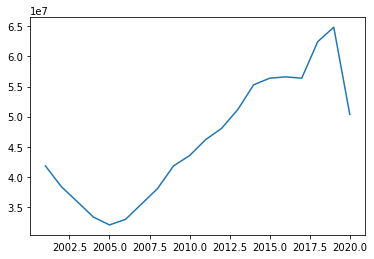

In [20]:
plt.plot(dataset5.iloc[:,0], dataset5.iloc[:,2])

## 자동차 연비

In [21]:
dataset6 = pd.read_csv('car_cost.csv', encoding='cp949')
dataset6.head()

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,배출량(CO2),자동차유형
0,Mercedes-Benz GLE350 e 4MATIC\t,벤츠,전기+휘발유,1991.00,자동9,2.5 / 8.9,PHEV,26.00,다목적형
1,볼보 XC90B5 AWD,볼보,휘발유,1969.00,자동8,9.7,4등급,176.00,다목적형
2,Mercedes-Benz GLE300 d 4MATIC (5 Seater),벤츠,경유,1993.00,자동9,11.9,3등급,161.00,다목적형
3,Mercedes-Benz GLE350 e 4MATIC Coupe,벤츠,전기+휘발유,1991.00,자동9,2.5 / 8.7,PHEV,27.00,다목적형
4,Mercedes-Benz GLE300 d 4MATIC,벤츠,경유,1993.00,자동9,11.9,3등급,161.00,다목적형


In [32]:
dataset6[dataset6['제조사'] == '벤츠'].head()

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,배출량(CO2),자동차유형
0,Mercedes-Benz GLE350 e 4MATIC\t,벤츠,전기+휘발유,1991.00,자동9,2.5 / 8.9,PHEV,26.00,다목적형
2,Mercedes-Benz GLE300 d 4MATIC (5 Seater),벤츠,경유,1993.00,자동9,11.9,3등급,161.00,다목적형
3,Mercedes-Benz GLE350 e 4MATIC Coupe,벤츠,전기+휘발유,1991.00,자동9,2.5 / 8.7,PHEV,27.00,다목적형
4,Mercedes-Benz GLE300 d 4MATIC,벤츠,경유,1993.00,자동9,11.9,3등급,161.00,다목적형
6,Mercedes-Benz GLS400 d 4MATIC (MY22),벤츠,경유,2925.00,자동9,9.8,4등급,199.00,다목적형


## Uber Pool 데이터 추출 후 거리당 가격 그래프 단순선형회귀

In [51]:
dataset7 = pd.read_csv('cab_rides.csv', encoding='cp949')
dataset7.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544950000000.00,North Station,Haymarket Square,5.00,1.00,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543280000000.00,North Station,Haymarket Square,11.00,1.00,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543370000000.00,North Station,Haymarket Square,7.00,1.00,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543550000000.00,North Station,Haymarket Square,26.00,1.00,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543460000000.00,North Station,Haymarket Square,9.00,1.00,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [70]:
dataset_uberpool = dataset7[dataset7['name']=='UberPool']
dataset_uberpool.reset_index(inplace=True)
dataset_uberpool.drop('index', axis=1, inplace=True)
dataset_uberpool.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,1.11,Uber,1543520000000.00,West End,North End,5.50,1.00,e219e545-a006-4936-a6cc-7d00adf0e418,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
1,2.48,Uber,1545090000000.00,South Station,Beacon Hill,7.00,1.00,80d2a972-2686-4edc-bc22-ddccdf211fde,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
2,2.94,Uber,1544860000000.00,Fenway,North Station,9.00,1.00,d25c46f2-b8a3-454d-97d1-4e2c8e1dff68,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
3,1.16,Uber,1544860000000.00,West End,North End,7.00,1.00,c53e48e4-a7b6-43e9-b4f4-afadc78dc2aa,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
4,3.39,Uber,1543360000000.00,North Station,Boston University,10.00,1.00,76ec209b-45a1-47e7-9eda-bc3a22402b8e,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


In [77]:
uber_price_a = dataset_uberpool['price'].mean()
uber_distance_a = dataset_uberpool['distance'].mean()
print('평균 거리 : {0:.4f} 평균 가격 : {1:.3f}달러'.format(uber_distance_a ,uber_price_a,3))

평균 거리 : 2.1914 평균 가격 : 8.753달러


In [79]:
dataset_uberpool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55091 entries, 0 to 55090
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          55091 non-null  float64
 1   cab_type          55091 non-null  object 
 2   time_stamp        55091 non-null  float64
 3   destination       55091 non-null  object 
 4   source            55091 non-null  object 
 5   price             55091 non-null  float64
 6   surge_multiplier  55091 non-null  float64
 7   id                55091 non-null  object 
 8   product_id        55091 non-null  object 
 9   name              55091 non-null  object 
dtypes: float64(4), object(6)
memory usage: 4.2+ MB


In [104]:
X = dataset_uberpool.iloc[:,:1].values
y = dataset_uberpool['price'].values

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(X) # X에 대한 예측값 출력

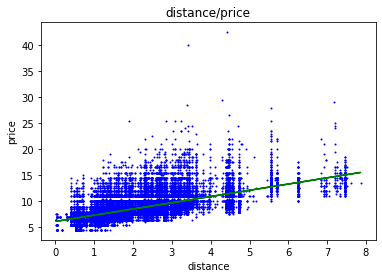

In [118]:
plt.scatter(X,y,color='blue', s=1) # 산점도
plt.plot(X,y_pred, color='green') # 선 그래프
plt.title("distance/price")
plt.xlabel('distance')
plt.ylabel('price')
plt.show()